# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


In [127]:
#
#
#
#
# Your code to develop AI model for malware classification.
# Hint: Use the example code provided in previous lab.
#
#
#
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time
import warnings
warnings.filterwarnings('ignore')

In [128]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [129]:
# --------------- DATA LOADING AND PREPROCESSING ---------------#

print("Loading the Android Malware dataset...")

Loading the Android Malware dataset...


In [130]:
# Load the dataset
df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')

In [131]:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset shape: (15036, 216)

First few rows of the dataset:
   transact  onServiceConnected  bindService  attachInterface  \
0         0                   0            0                0   
1         0                   0            0                0   
2         0                   0            0                0   
3         0                   0            0                0   
4         0                   0            0                0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                  0                  0         1   
1                  0                  0         1   
2                  0                  0         1   
3                  0                  0         0   
4                  0                  0         0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                  0                            0   
1                                  0                            0   
2                      

In [132]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB
None


In [133]:

print("\nChecking for missing values:")
print(df.isnull().sum().sum())

# We know from the dataset metadata that the label column is named 'class'
label_column = 'class'

# Check class distribution
print("\nClass distribution:")
print(df[label_column].value_counts())


Checking for missing values:
0

Class distribution:
class
B    9476
S    5560
Name: count, dtype: int64


In [134]:
# ---------------- FEATURE ENGINEERING ----------------

print("\nPreprocessing the dataset...")


Preprocessing the dataset...


In [136]:
# Convert categorical features to numerical if any exist
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
if label_column in categorical_columns:
    categorical_columns.remove(label_column)

if categorical_columns:
    print(f"\nEncoding categorical features: {categorical_columns}")
    for col in categorical_columns:
        # First convert all values to strings to handle mixed types
        df[col] = df[col].astype(str)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Encode the label if it's categorical
if df[label_column].dtype == 'object':
    print("\nEncoding target variable...")
    le = LabelEncoder()
    df[label_column] = le.fit_transform(df[label_column])
    print(f"Encoded labels: {dict(zip(le.classes_, le.transform(le.classes_)))}")




Encoding categorical features: ['TelephonyManager.getSimCountryIso']

Encoding target variable...
Encoded labels: {'B': np.int64(0), 'S': np.int64(1)}


In [137]:
# Separate features and target
X = df.drop(label_column, axis=1)
y = df[label_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



Training set shape: (12028, 215)
Testing set shape: (3008, 215)


In [138]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
# ---------------- MODEL DEVELOPMENT ----------------

# Dictionary to store model results
model_results = {
    'model_name': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'training_time': []
}

# Function to evaluate model and store results
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    model_results['model_name'].append(model_name)
    model_results['accuracy'].append(accuracy)
    model_results['precision'].append(precision)
    model_results['recall'].append(recall)
    model_results['f1_score'].append(f1)
    model_results['training_time'].append(training_time)

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model, y_pred

print("\nTraining and evaluating models...")



Training and evaluating models...



1. Random Forest Classifier

Random Forest Results:
Accuracy: 0.9864
Precision: 0.9864
Recall: 0.9864
F1 Score: 0.9863
Training Time: 1.32 seconds


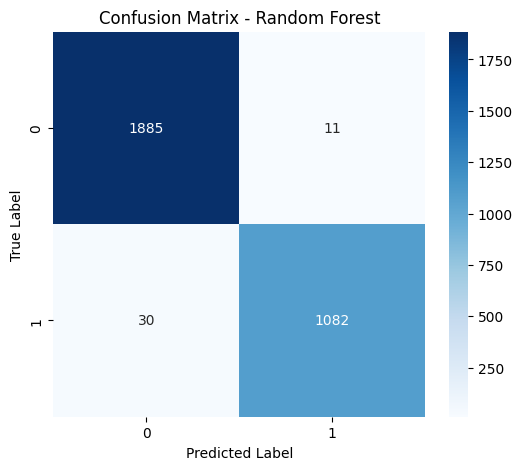


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1896
           1       0.99      0.97      0.98      1112

    accuracy                           0.99      3008
   macro avg       0.99      0.98      0.99      3008
weighted avg       0.99      0.99      0.99      3008



In [140]:
# -------- MODEL 1: Random Forest Classifier --------
print("\n1. Random Forest Classifier")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model, y_pred_rf = evaluate_model(rf_model, 'Random Forest', X_train_scaled, X_test_scaled, y_train, y_test)


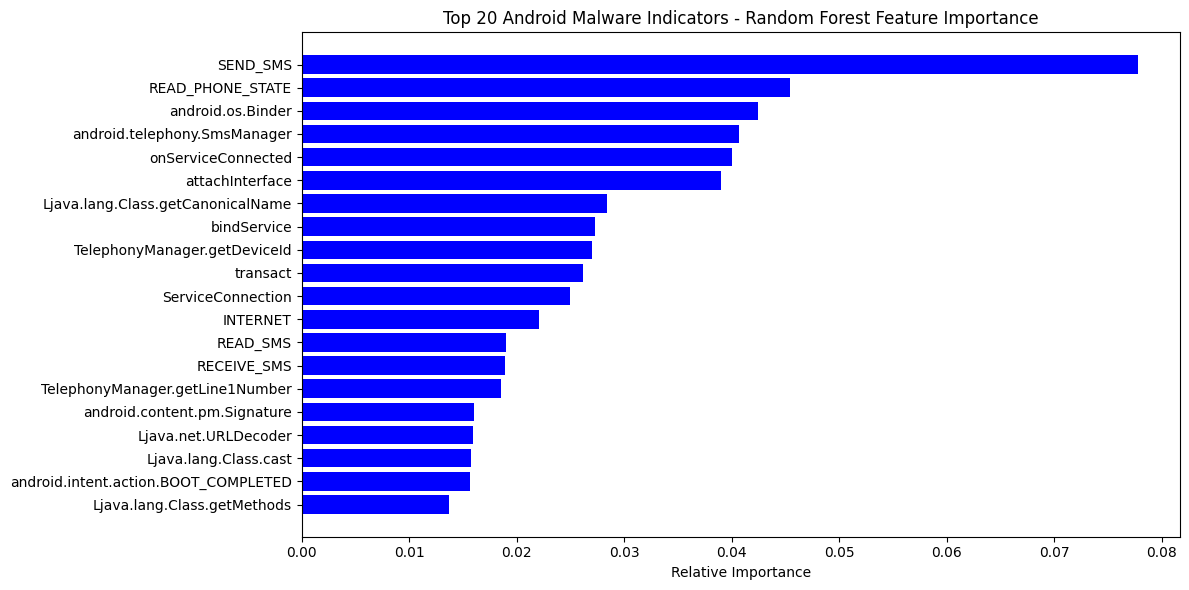

In [141]:
# Feature importance for Random Forest - showing top Android malware indicators
plt.figure(figsize=(12, 6))
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features
plt.title('Top 20 Android Malware Indicators - Random Forest Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

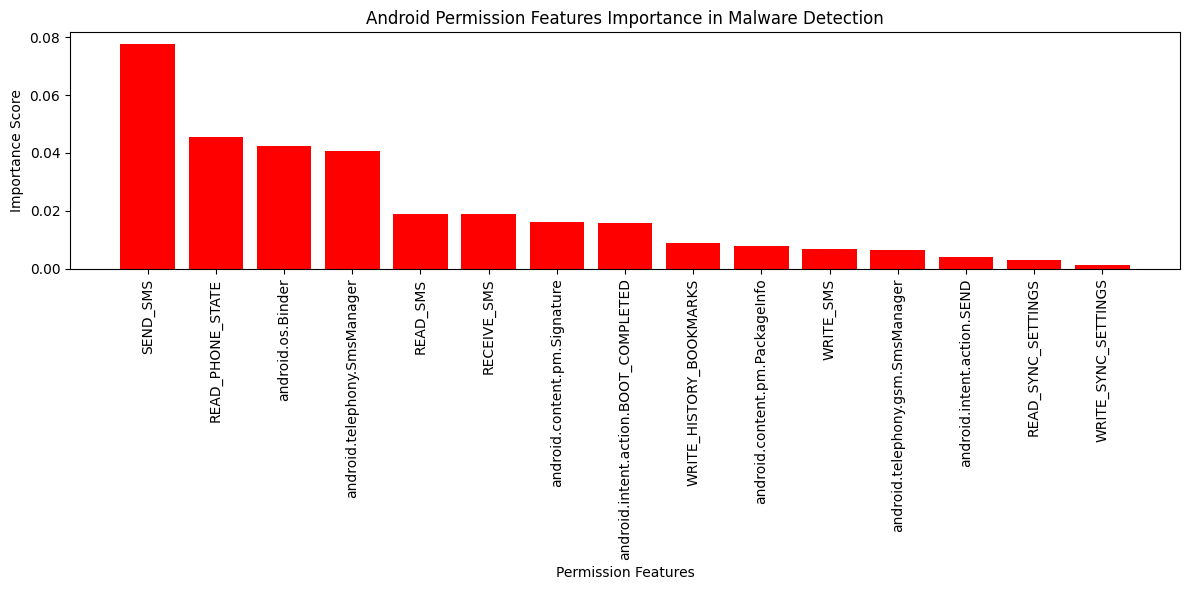

In [142]:
# Additional Android-specific visualization
# Create a visualization that highlights permission-related features
permission_features = [col for col in X.columns if 'PERMISSION' in col.upper() or col.startswith('android') or 'SMS' in col.upper() or 'INTERNET' in col.upper() or 'READ_' in col or 'WRITE_' in col]
if permission_features:
    # Get importance scores for permission features
    perm_importances = []
    perm_names = []
    for feature in permission_features[:15]:  # Top 15 permission features
        idx = list(X.columns).index(feature)
        perm_importances.append(rf_model.feature_importances_[idx])
        perm_names.append(feature)

    # Sort by importance
    perm_data = sorted(zip(perm_names, perm_importances), key=lambda x: x[1], reverse=True)
    perm_names = [x[0] for x in perm_data]
    perm_importances = [x[1] for x in perm_data]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(perm_names)), perm_importances, color='r')
    plt.xticks(range(len(perm_names)), perm_names, rotation=90)
    plt.title('Android Permission Features Importance in Malware Detection')
    plt.xlabel('Permission Features')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.show()



2. XGBoost Classifier

XGBoost Results:
Accuracy: 0.9897
Precision: 0.9897
Recall: 0.9897
F1 Score: 0.9897
Training Time: 0.82 seconds


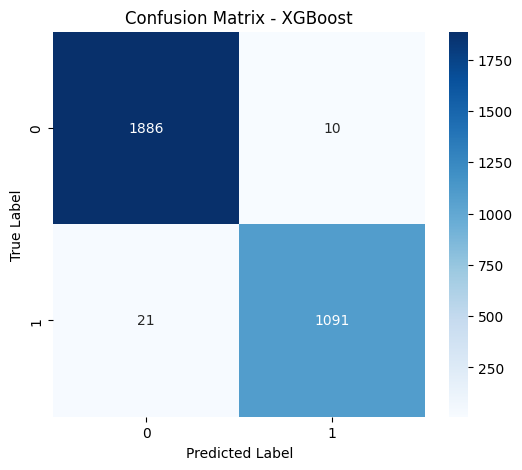


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1896
           1       0.99      0.98      0.99      1112

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008



In [143]:
# -------- MODEL 2: XGBoost Classifier --------
print("\n2. XGBoost Classifier")
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model, y_pred_xgb = evaluate_model(xgb_model, 'XGBoost', X_train_scaled, X_test_scaled, y_train, y_test)



3. Support Vector Machine

SVM Results:
Accuracy: 0.9814
Precision: 0.9814
Recall: 0.9814
F1 Score: 0.9814
Training Time: 35.56 seconds


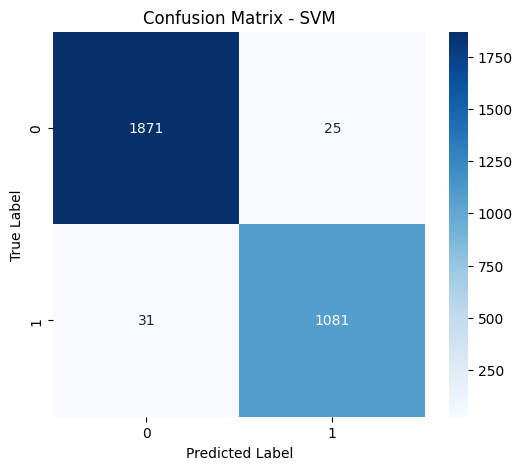


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1896
           1       0.98      0.97      0.97      1112

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



In [144]:
# -------- MODEL 3: Support Vector Machine --------
print("\n3. Support Vector Machine")
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model, y_pred_svm = evaluate_model(svm_model, 'SVM', X_train_scaled, X_test_scaled, y_train, y_test)


In [145]:
# -------- MODEL 4: Neural Network --------
print("\n4. Neural Network")



4. Neural Network


In [146]:
# Function to create and train the neural network
def train_neural_network(X_train, y_train, X_test, y_test):
    start_time = time.time()

    # Define the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=0
    )

    training_time = time.time() - start_time

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Neural Network Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Neural Network Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Make predictions
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    model_results['model_name'].append('Neural Network')
    model_results['accuracy'].append(accuracy)
    model_results['precision'].append(precision)
    model_results['recall'].append(recall)
    model_results['f1_score'].append(f1)
    model_results['training_time'].append(training_time)

    print(f"\nNeural Network Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Neural Network')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model, y_pred, history



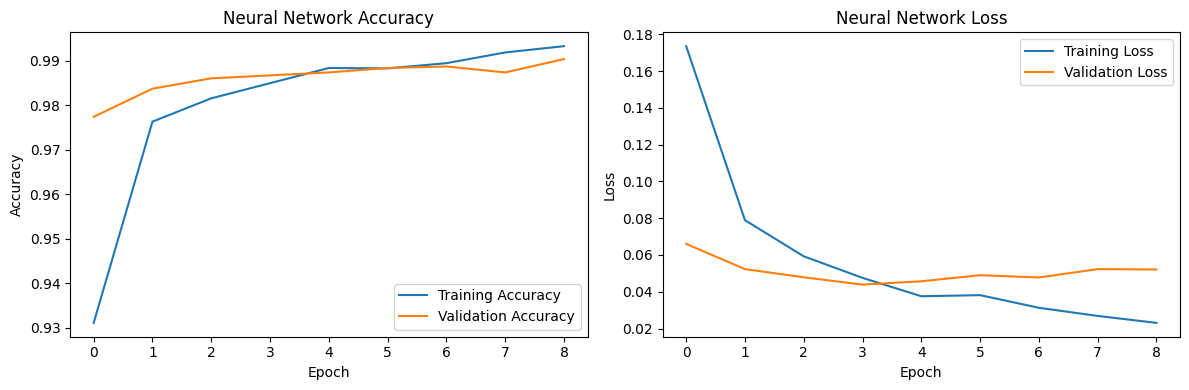

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Neural Network Results:
Accuracy: 0.9867
Precision: 0.9867
Recall: 0.9867
F1 Score: 0.9867
Training Time: 21.15 seconds


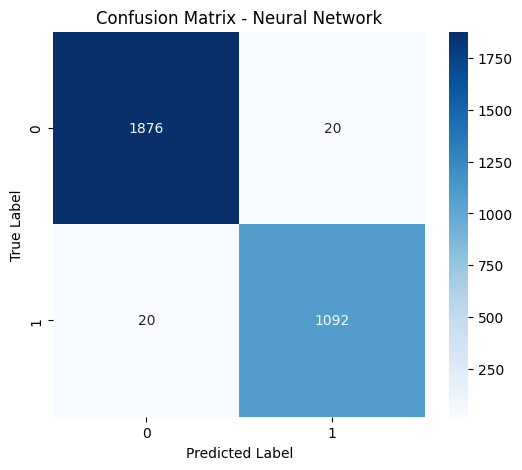


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1896
           1       0.98      0.98      0.98      1112

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008



In [147]:
nn_model, y_pred_nn, history = train_neural_network(X_train_scaled, y_train, X_test_scaled, y_test)



Comparing model performance...

Model comparison:
       model_name  accuracy  precision    recall  f1_score  training_time
0   Random Forest  0.986370   0.986405  0.986370  0.986345       1.321346
1         XGBoost  0.989694   0.989701  0.989694  0.989683       0.821982
2             SVM  0.981383   0.981370  0.981383  0.981373      35.564136
3  Neural Network  0.986702   0.986702  0.986702  0.986702      21.152835


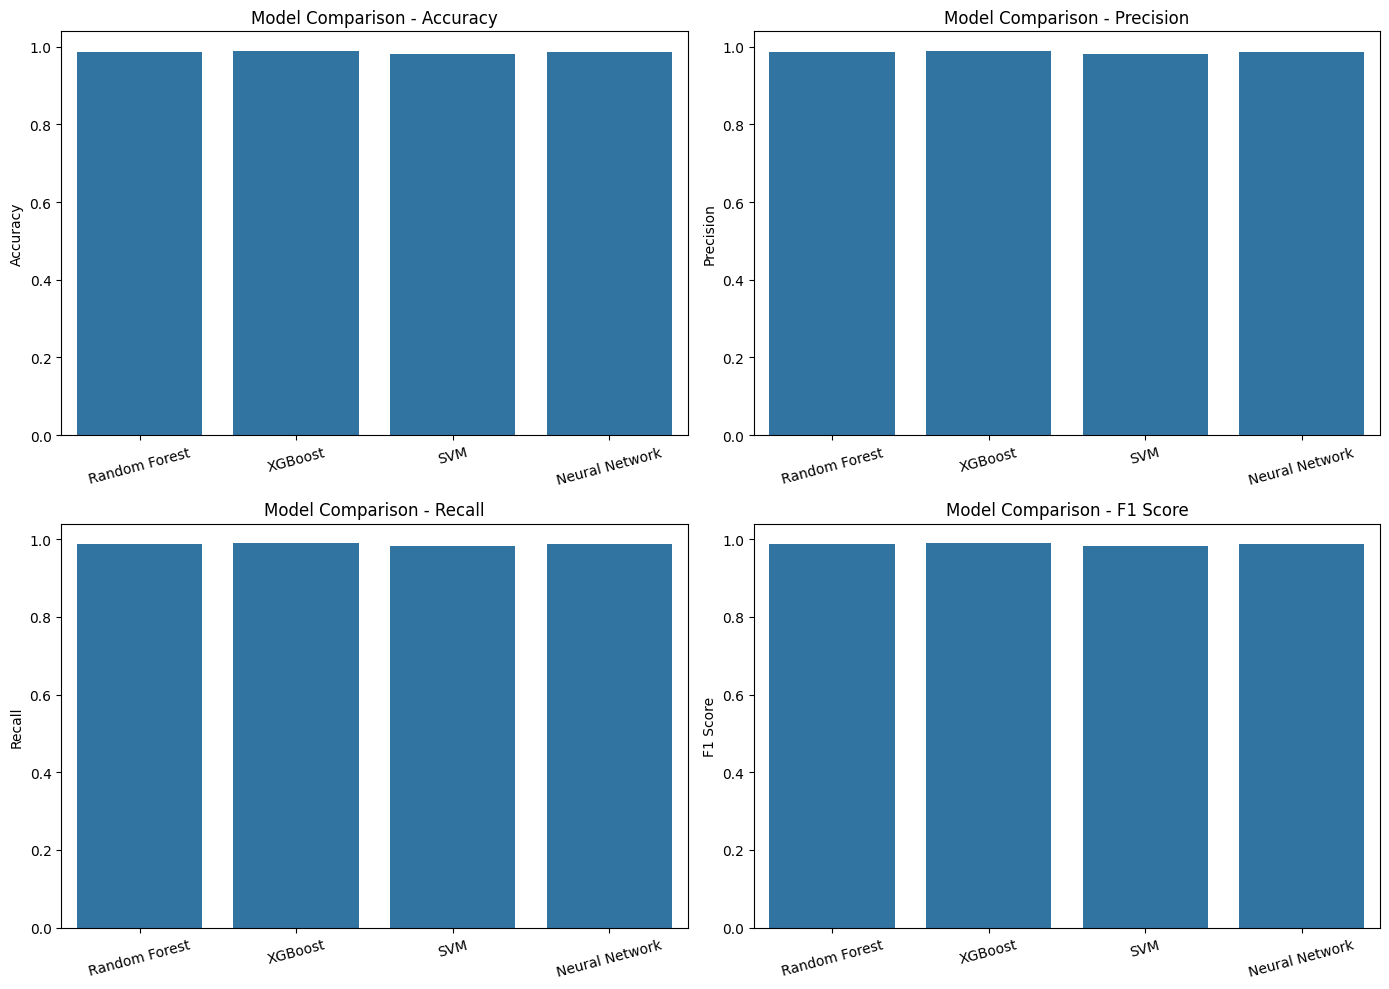

In [148]:
# ---------------- MODEL COMPARISON ----------------

print("\nComparing model performance...")

# Create a DataFrame for easy comparison
results_df = pd.DataFrame(model_results)
print("\nModel comparison:")
print(results_df)

# Plot the performance metrics for comparison
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='model_name', y=metric, data=results_df)
    plt.title(f'Model Comparison - {metric.replace("_", " ").title()}')
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel('')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()



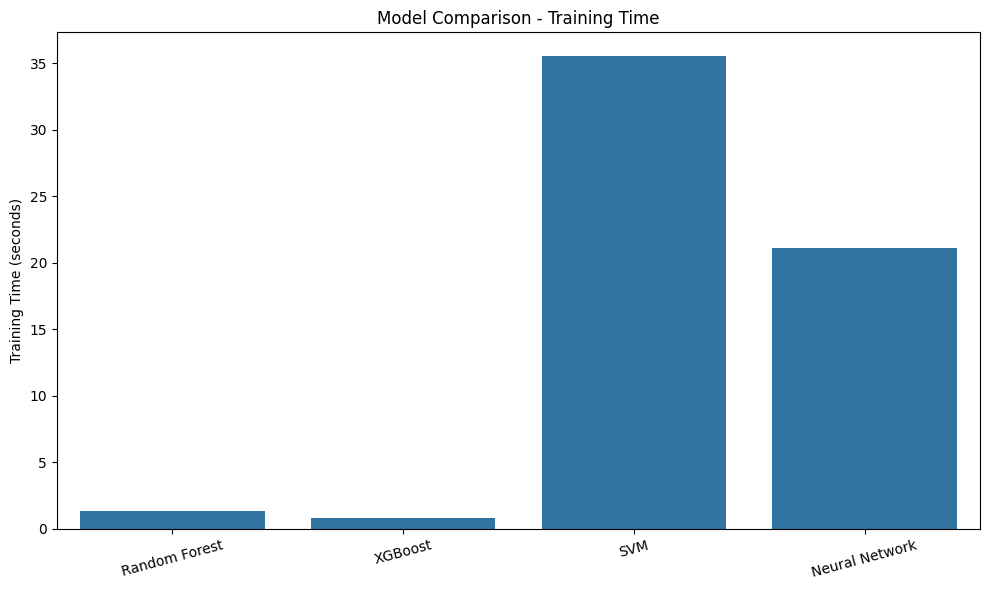

In [149]:
# Training time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='training_time', data=results_df)
plt.title('Model Comparison - Training Time')
plt.ylabel('Training Time (seconds)')
plt.xlabel('')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()